## Multi-label classification

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.conv_learner import *

In [3]:
PATH = Path('data')

In [4]:
IMPATH = PATH/'images'

In [5]:
list(PATH.iterdir())

[PosixPath('data/images'),
 PosixPath('data/train_val_list.txt'),
 PosixPath('data/Data_Entry_2017.csv'),
 PosixPath('data/test_list.txt'),
 PosixPath('data/tmp'),
 PosixPath('data/compressed'),
 PosixPath('data/models'),
 PosixPath('data/labels.csv')]

In [6]:
label_df = pd.read_csv(PATH/'Data_Entry_2017.csv')

In [7]:
label_df.head()

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN


In [8]:
labels = [' '.join(x.split('|')).replace('No Finding', '') for x in label_df['Finding Labels']]

In [9]:
fnames = label_df['Image Index'].values

In [10]:
pd.DataFrame({'fname': fnames, 'labels': labels}).to_csv(PATH/'labels.csv', index=False)

In [11]:
pd.read_csv(PATH/'labels.csv')

,fname,labels
0,00000001_000.png,Cardiomegaly
1,00000001_001.png,Cardiomegaly Emphysema
2,00000001_002.png,Cardiomegaly Effusion
3,00000002_000.png,NaN
4,00000003_000.png,Hernia
5,00000003_001.png,Hernia
6,00000003_002.png,Hernia
7,00000003_003.png,Hernia Infiltration
8,00000003_004.png,Hernia
9,00000003_005.png,Hernia


## Multi-label versus single-label classification

In [12]:
from fastai.plots import *

In [13]:
def show_img(im, figsize=None, ax=None, alpha=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im, alpha=alpha)
    ax.set_axis_off()
    return ax

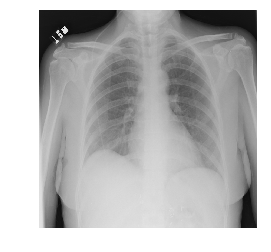

In [14]:
tmp_fname = next(IMPATH.iterdir())
print(labels[int(np.where(fnames == tmp_fname.name)[0])])
show_img(open_image(tmp_fname))

## Multi-label models for Planet dataset

In [ ]:
from planet import *

metrics=[f1_opt_t]

In [16]:
arch = resnet18

In [17]:
n = len(labels) # only if label_csv and files in folder match perfectly
val_idxs = get_cv_idxs(n)

In [18]:
n

112120

In [30]:
sz = 61
bs=128
nw=8

In [31]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.05)

In [32]:
PATH = Path('data/tmp/83')

In [33]:
md = ImageClassifierData.from_csv(PATH, folder='images', 
                                        csv_fname='data/labels.csv', bs=bs, tfms=tfms, skip_header=True,
                                        val_idxs=val_idxs, num_workers=nw)

In [34]:
x,y = next(iter(md.trn_dl))

In [35]:
x.shape

torch.Size([128, 3, 61, 61])

In [36]:
y.shape

torch.Size([128, 14])

In [29]:
def get_data(sz):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, folder='images', 
                                        csv_fname=PATH/'labels.csv', tfms=tfms, skip_header=True,
                                        val_idxs=val_idxs)

In [30]:
sz=64

In [31]:
data = get_data(sz)

In [32]:
len(data.classes)

14

In [33]:
data.trn_y.shape

(89696, 14)

In [34]:
# Resizes and stores images in direcotry 'tmp'
data = data.resize(int(sz*1.3), 'tmp')

In [37]:
metrics=None

In [39]:
learn = ConvLearner.pretrained(arch, md, metrics=metrics)

epoch      trn_loss   val_loss   <lambda>                    
    0      0.196352   0.193157   0.948824  



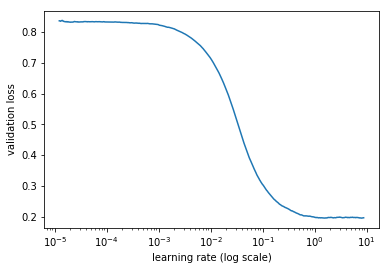

In [40]:
lrf=learn.lr_find()
learn.sched.plot()

In [41]:
lr = 1e-1

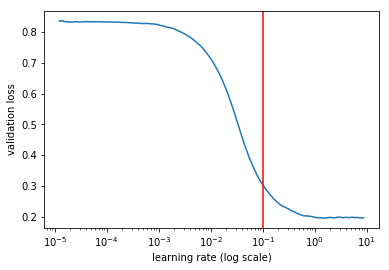

In [42]:
learn.sched.plot()
plt.axvline(lr, color='r')
plt.show()

In [ ]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   <lambda>                    
    0      0.176431   0.17057    0.949114  
 22%|██▏       | 151/701 [09:56<36:13,  3.95s/it, loss=0.178]

In [ ]:
tmp = learn.predict()

In [ ]:
from sklearn.metrics import *

In [ ]:
list(zip(data.classes, roc_auc_score(data.val_y, tmp, average=None)))

In [ ]:
list(zip(data.classes, roc_auc_score(data.val_y, tmp, average=None)))

In [ ]:
list(zip(data.classes, roc_auc_score(data.val_y, tmp, average=None)))

In [ ]:
learn.sched.plot_loss()

In [ ]:
learn.save('init_pre')

In [ ]:
learn.load('init_pre')

In [ ]:
lrs = np.array([lr/9,lr/3,lr])

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.sched.plot_loss()

In [ ]:
learn.save('init_all')

In [ ]:
sz=128

In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}_all')

In [ ]:
learn.sched.plot_loss()

In [ ]:
sz=256

In [ ]:
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [ ]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [ ]:
f2(preds,y)

In [ ]:
list(zip(data.classes, roc_auc_score(data.val_y, preds, average=None)))

In [ ]:
f2(preds,y)

### End